In [ ]:
from google.colab import files

# Upload the file manually
uploaded = files.upload()

Saving final_data_with_long_titles.csv to final_data_with_long_titles.csv


In [21]:
# Load the uploaded CSV file
import pandas as pd
final_data = pd.read_csv(list(uploaded.keys())[0])

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    average_precision_score,
    f1_score,
    auc,
)
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib

In [22]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(final_data.head())

# Check the shape of the dataset
print(f"Dataset shape: {final_data.shape}")

First 5 rows of the dataset:
   subject_id   hadm_id gender  age     classification  \
0    10000980  26913865      F   76  Only_hypertension   
1    10001217  24597018      F   55  Only_hypertension   
2    10001401  21544441      F   89  Only_hypertension   
3    10001884  26202981      F   76  Only_hypertension   
4    10002013  23581541      F   57  Only_hypertension   

   Intestinal infection due to Clostridium difficile[00845]  \
0                                                  0          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          

   Unspecified septicemia[0389]  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   

   Streptococcus infection in co

In [23]:
# Check for missing values
missing_values = final_data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Series([], dtype: int64)


In [24]:
# Function to clean column names
def clean_column_names(columns):
    """
    Replace problematic characters in column names with underscores.
    """
    return [
        str(col)
        .replace('[', '_')
        .replace(']', '_')
        .replace('<', '_')
        .replace('>', '_')
        .replace('/', '_')
        .replace(' ', '_')
        for col in columns
    ]

In [25]:
# Create target variable 'stroke'
# If 'classification' == 'stroke_after_hypertension', then stroke = 1, else stroke = 0
final_data['stroke'] = np.where(final_data['classification'] == 'stroke_after_hypertension', 1, 0)

# Drop unnecessary columns
data = final_data.drop(columns=['subject_id', 'hadm_id', 'classification'])

# Clean column names
data.columns = clean_column_names(data.columns)

# Convert categorical variables to numeric
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].astype('category').cat.codes

# Splitting features and target
target = 'stroke'
X = data.drop(columns=[target])
y = data[target]

In [26]:
# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Logistic Regression Accuracy: 0.7841830695716978
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.64      0.75     11618
           1       0.71      0.94      0.81     11193

    accuracy                           0.78     22811
   macro avg       0.81      0.79      0.78     22811
weighted avg       0.82      0.78      0.78     22811

Confusion Matrix for Logistic Regression:
 [[ 7392  4226]
 [  697 10496]]


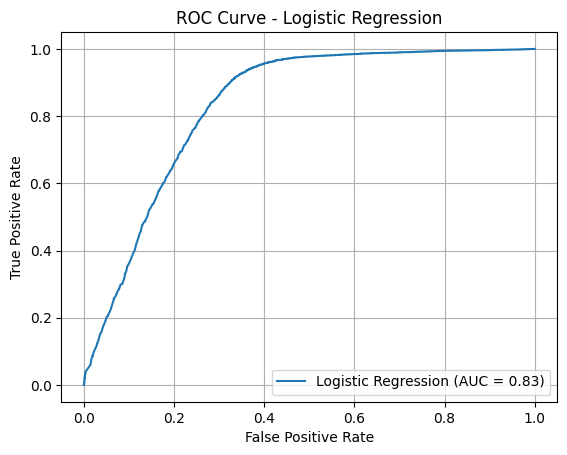

In [27]:
# Baseline Model: Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions and Evaluation for Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_log_reg))

# ROC Curve for Logistic Regression
y_pred_log_reg_prob = log_reg.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg_prob)
plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_log_reg_prob)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Random Forest Accuracy: 0.8403840252509754
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82     11618
           1       0.77      0.96      0.86     11193

    accuracy                           0.84     22811
   macro avg       0.86      0.84      0.84     22811
weighted avg       0.86      0.84      0.84     22811

Confusion Matrix for Random Forest:
 [[ 8385  3233]
 [  408 10785]]


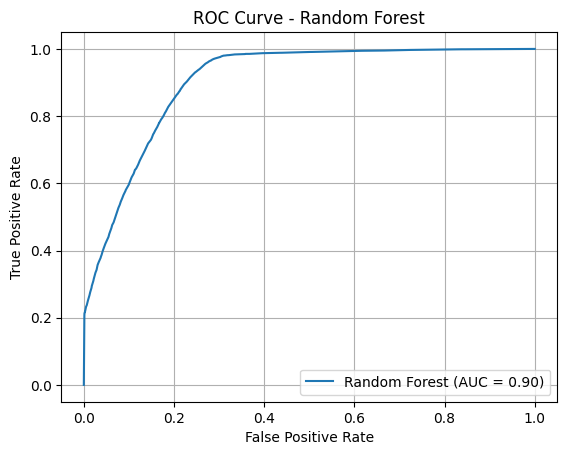

Top 10 Important Features:
 age                                            0.131386
Acute_respiratory_failure_51881_               0.025113
Atrial_fibrillation_42731_                     0.024575
Acute_kidney_failure,_unspecified_5849_        0.022177
Unspecified_essential_hypertension_4019_       0.020164
Congestive_heart_failure,_unspecified_4280_    0.018821
gender                                         0.018783
Unspecified_acquired_hypothyroidism_2449_      0.018340
Anemia,_unspecified_2859_                      0.018220
Acute_posthemorrhagic_anemia_2851_             0.017529
dtype: float64


<ipython-input-28-7011cd8a48d9>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp_top_n.values, y=feat_imp_top_n.index, palette='viridis')


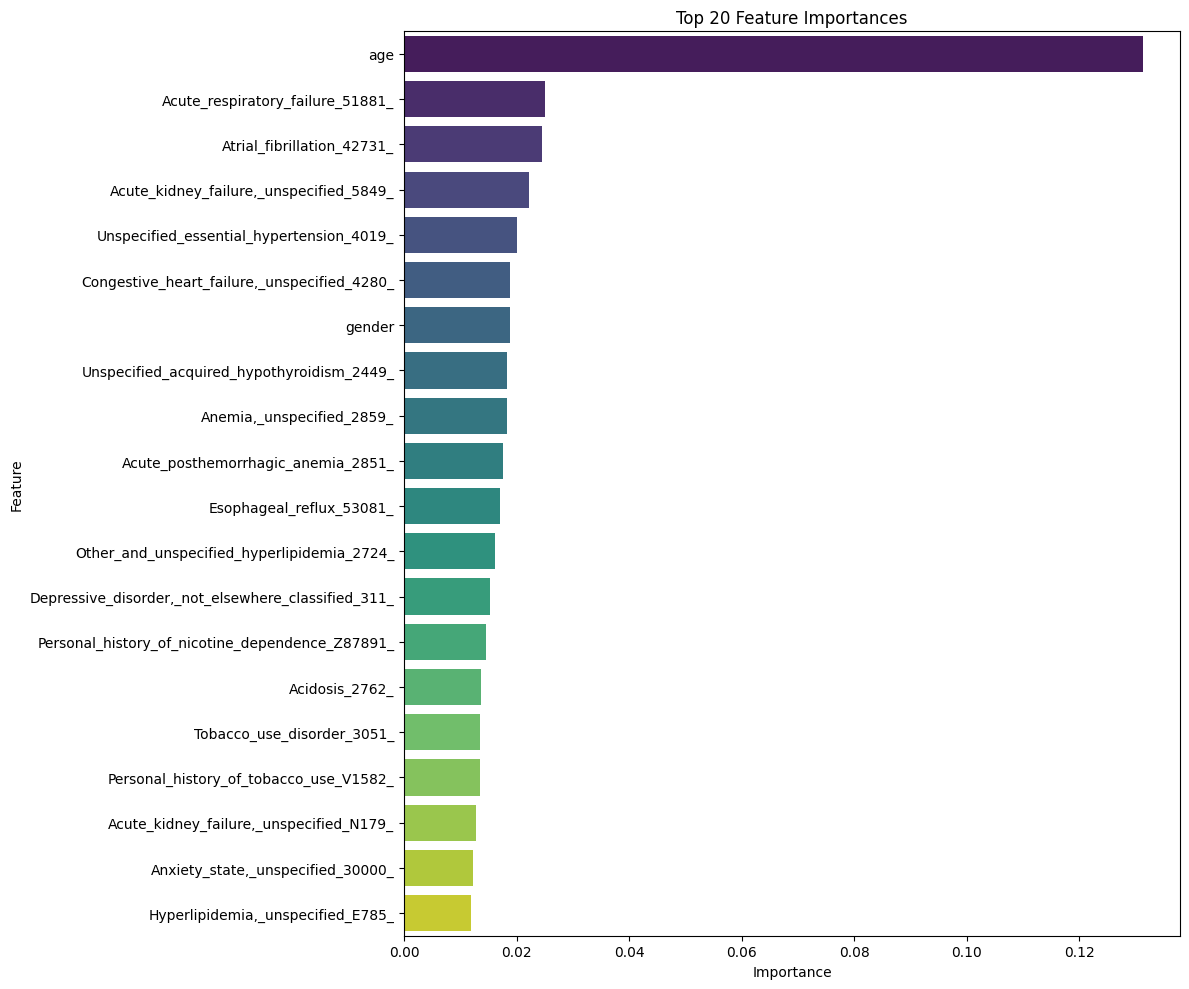

In [28]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))

# ROC Curve for Random Forest
y_pred_rf_prob = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_rf_prob)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Feature Importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("Top 10 Important Features:\n", feature_importances.head(10))

# Plot Feature Importances for top 20 features
top_n = 20
feat_imp_top_n = feature_importances.head(top_n)

plt.figure(figsize=(12, 10))
sns.barplot(x=feat_imp_top_n.values, y=feat_imp_top_n.index, palette='viridis')
plt.title(f'Top {top_n} Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()